In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
ev_st = pd.read_csv("/Users/sahithipadamati/Downloads/total_vs_Electricvehicles.csv")
print(ev_st)

        Sl. No.                                  State/UT  \
0             1                         Andaman & Nicobar   
1             2                         Arunachal Pradesh   
2             3                                     Assam   
3             4                                     Bihar   
4             5                                Chandigarh   
5             6                             Chhattishgarh   
6             7                                     Delhi   
7             8                                       Goa   
8             9                                   Gujarat   
9            10                                   Haryana   
10           11                          Himachal Pradesh   
11           12                         Jammu and Kashmir   
12           13                                 Jharkhand   
13           14                                 Karnataka   
14           15                                    Kerala   
15           16         

In [21]:
ev_st = ev_st.drop(['Sl. No.'],axis =1) # dropping s.no column
ev_st.rename(columns = {'Total Number of active Vehicle as on 08.12.2021':"total_vehicle_08122021",
                        "Total number of active Electric Vehicles as on 08.12.2021":"total_EV_08122021"},inplace =True)
print(ev_st.columns)

Index(['State/UT', 'total_vehicle_08122021', 'total_EV_08122021'], dtype='object')


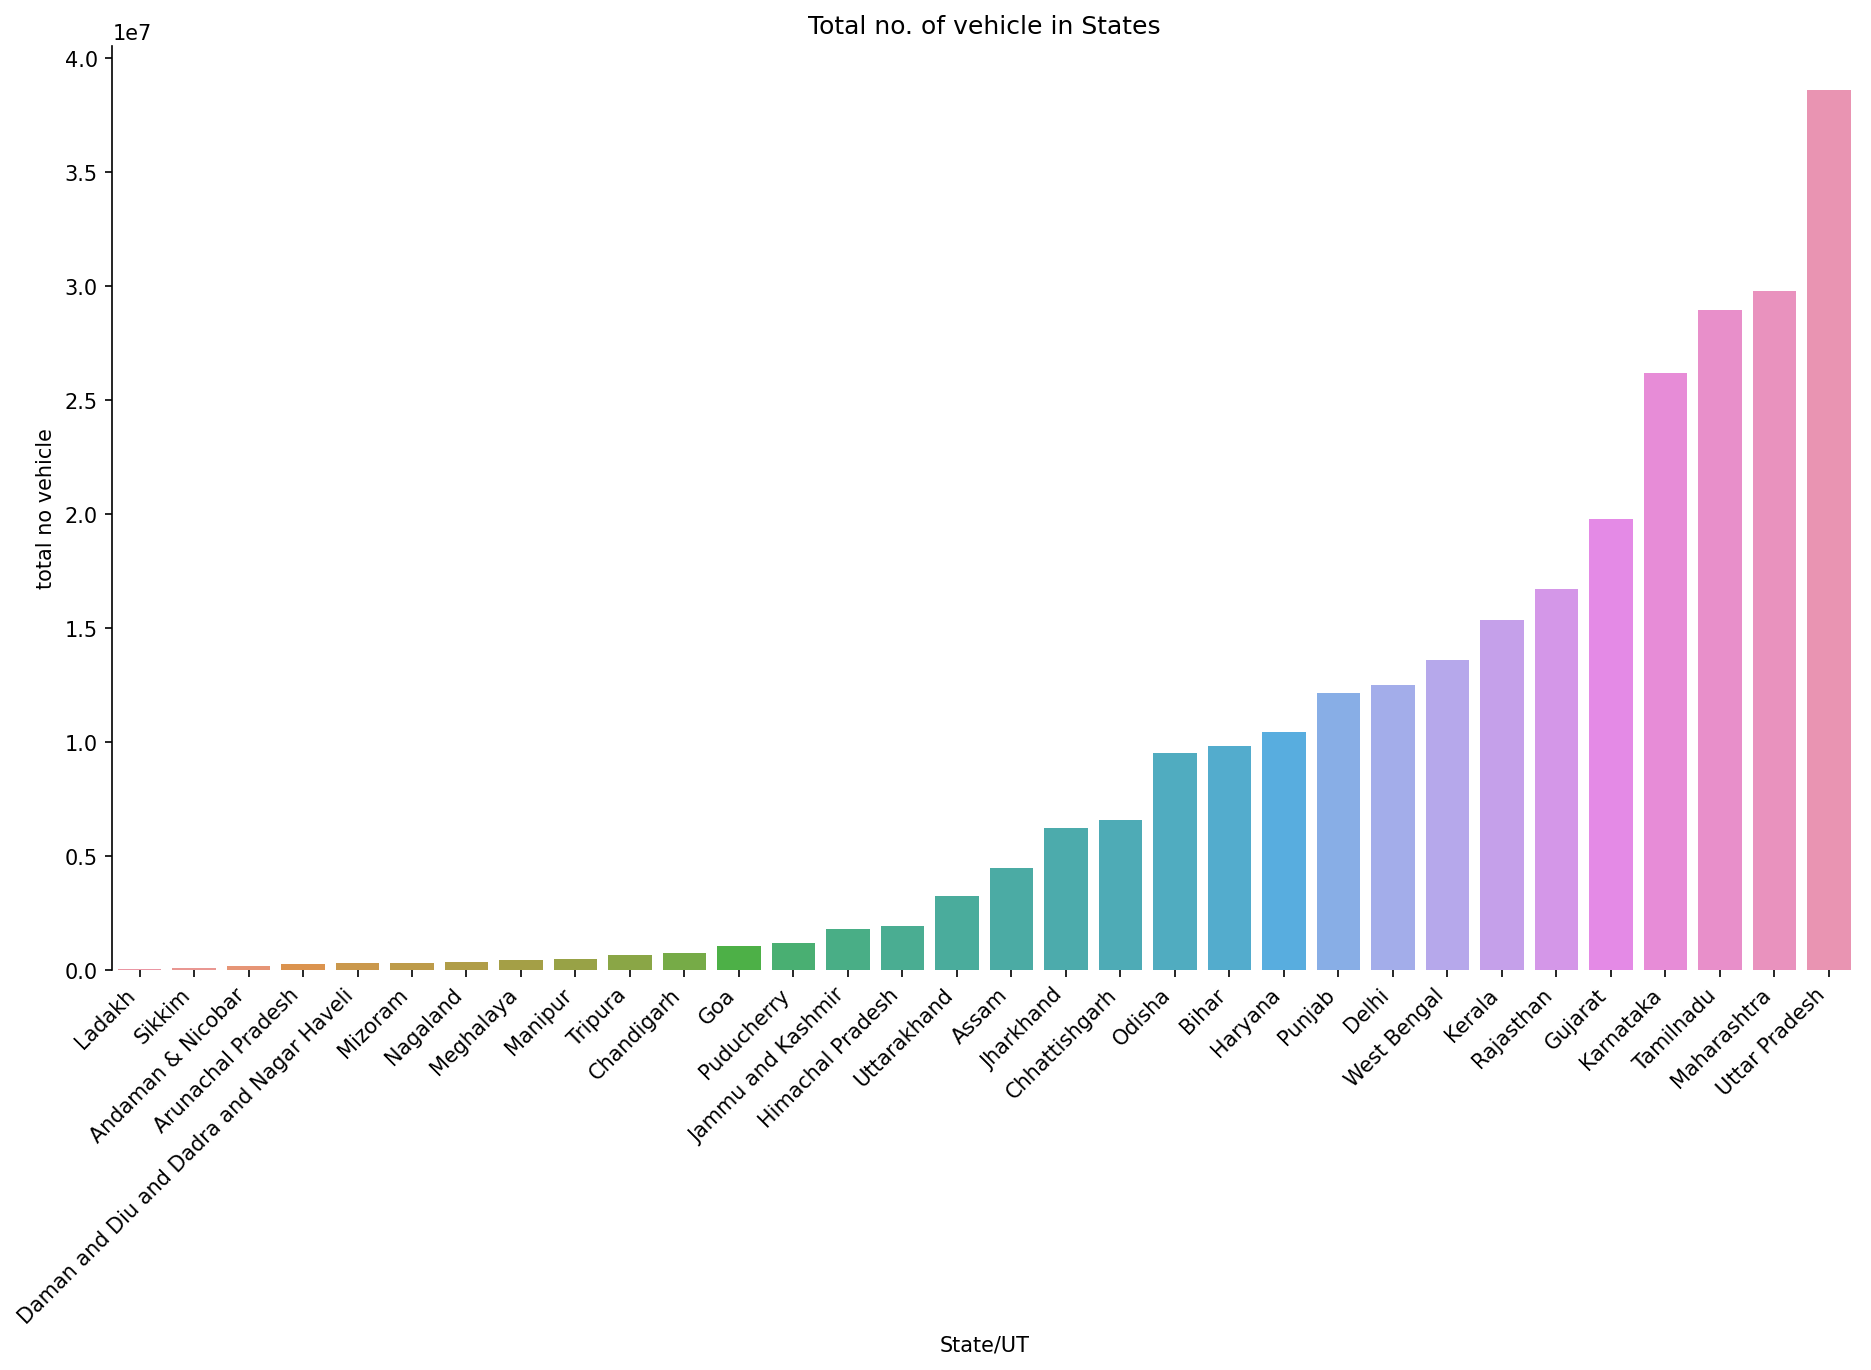

In [23]:
ev_st.drop([32],inplace = True)
ev_st = ev_st.sort_values('total_vehicle_08122021')
plt.figure(figsize=(15,8),dpi=150)
sns.barplot(x='State/UT',y='total_vehicle_08122021',data=ev_st,dodge=True,capsize=2)
plt.title("Total no. of vehicle in States")
plt.xticks(rotation =45,horizontalalignment='right')
plt.ylabel("total no vehicle")
sns.despine(right=True, bottom=True) 

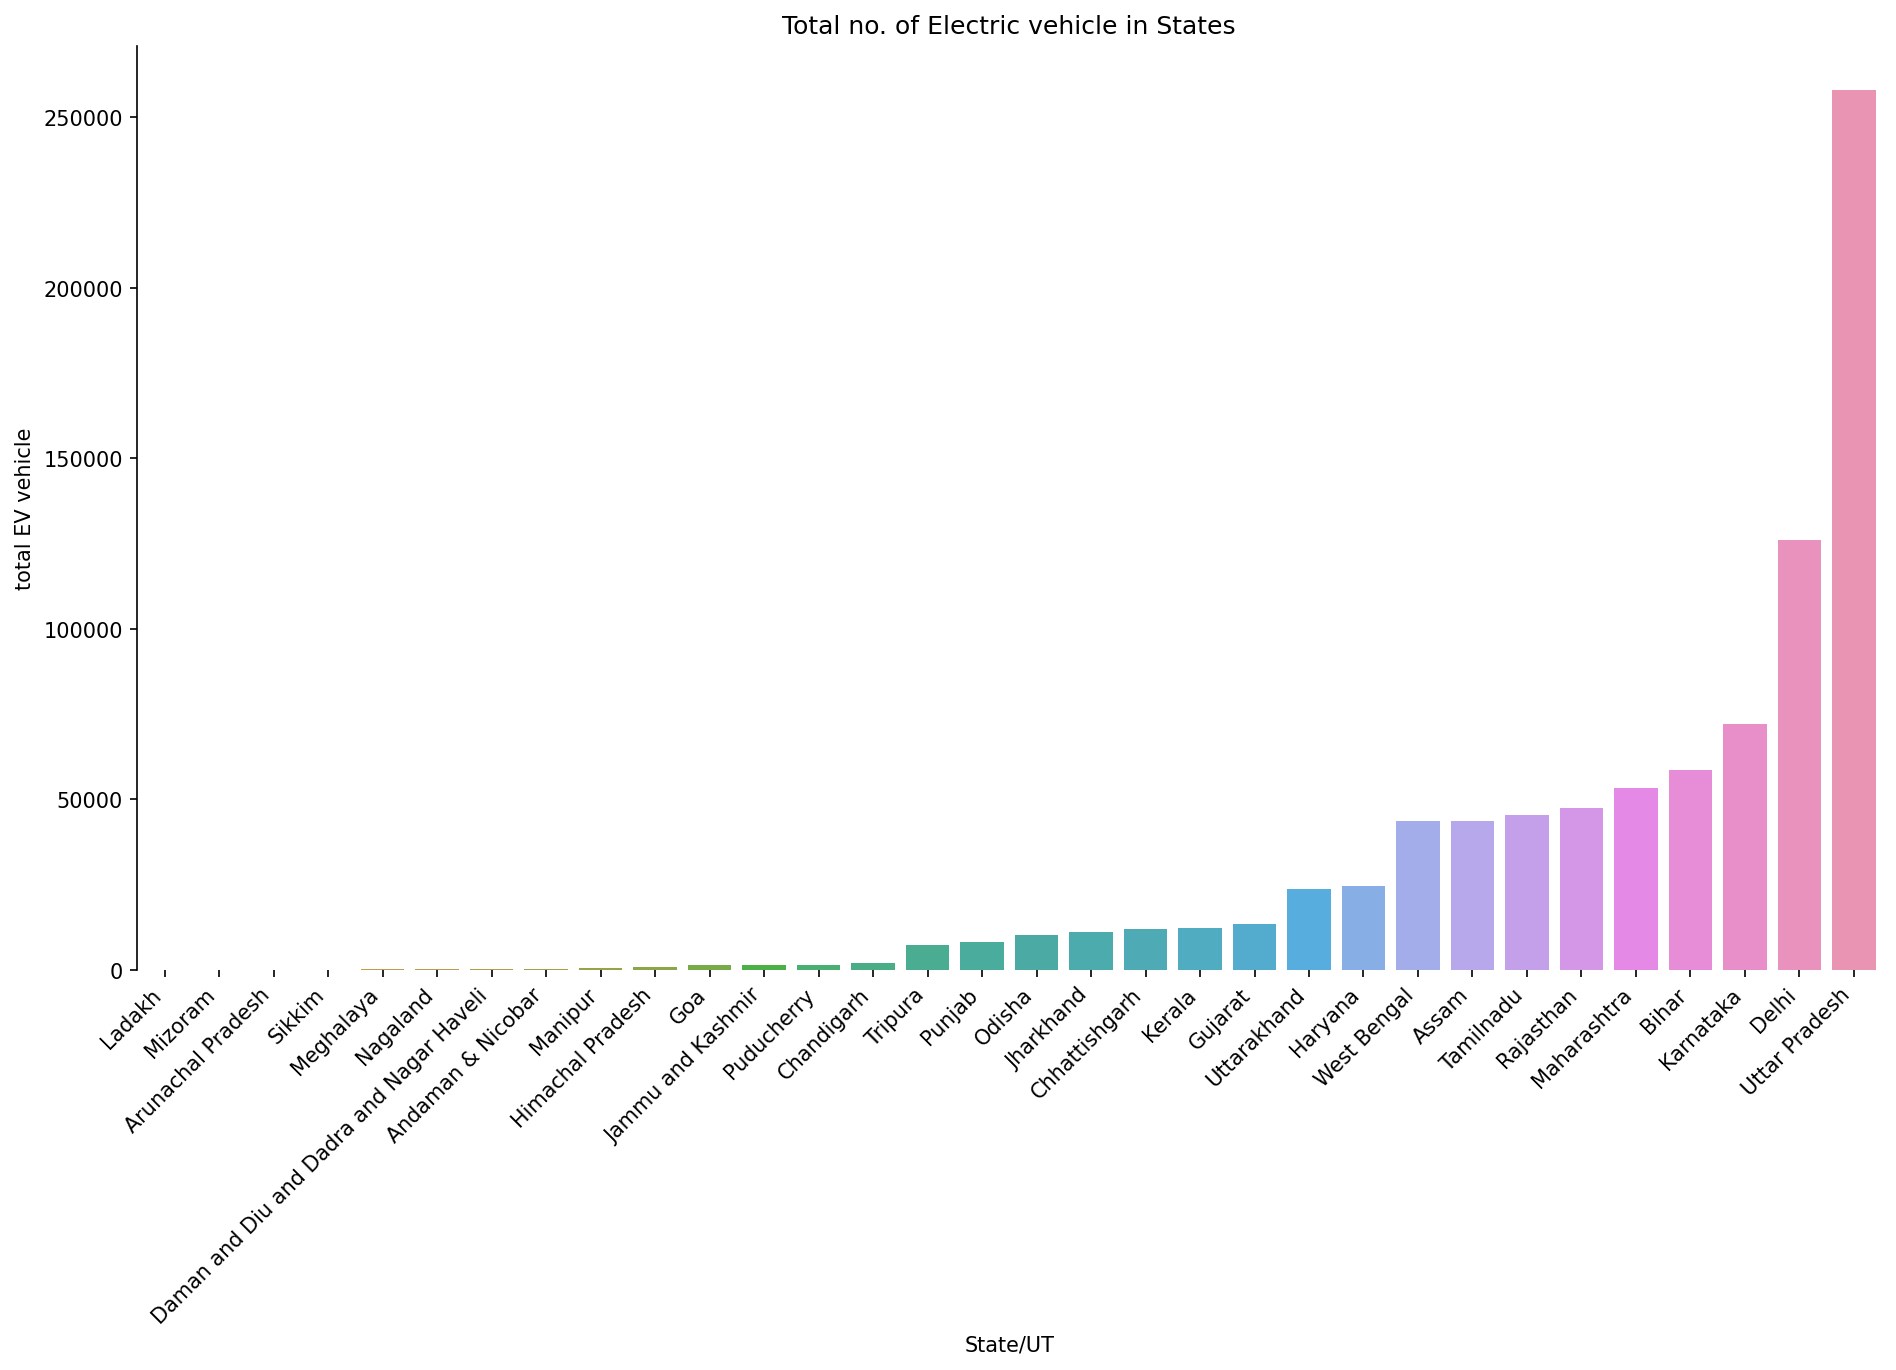

In [25]:
ev_st = ev_st.sort_values('total_EV_08122021')
plt.figure(figsize=(15,8),dpi=150)
sns.barplot(x='State/UT',y='total_EV_08122021',data=ev_st,dodge=True,capsize=2)
plt.title("Total no. of Electric vehicle in States")
plt.xticks(rotation =45,horizontalalignment='right')
plt.ylabel("total EV vehicle")
sns.despine(right=True, bottom=True) 

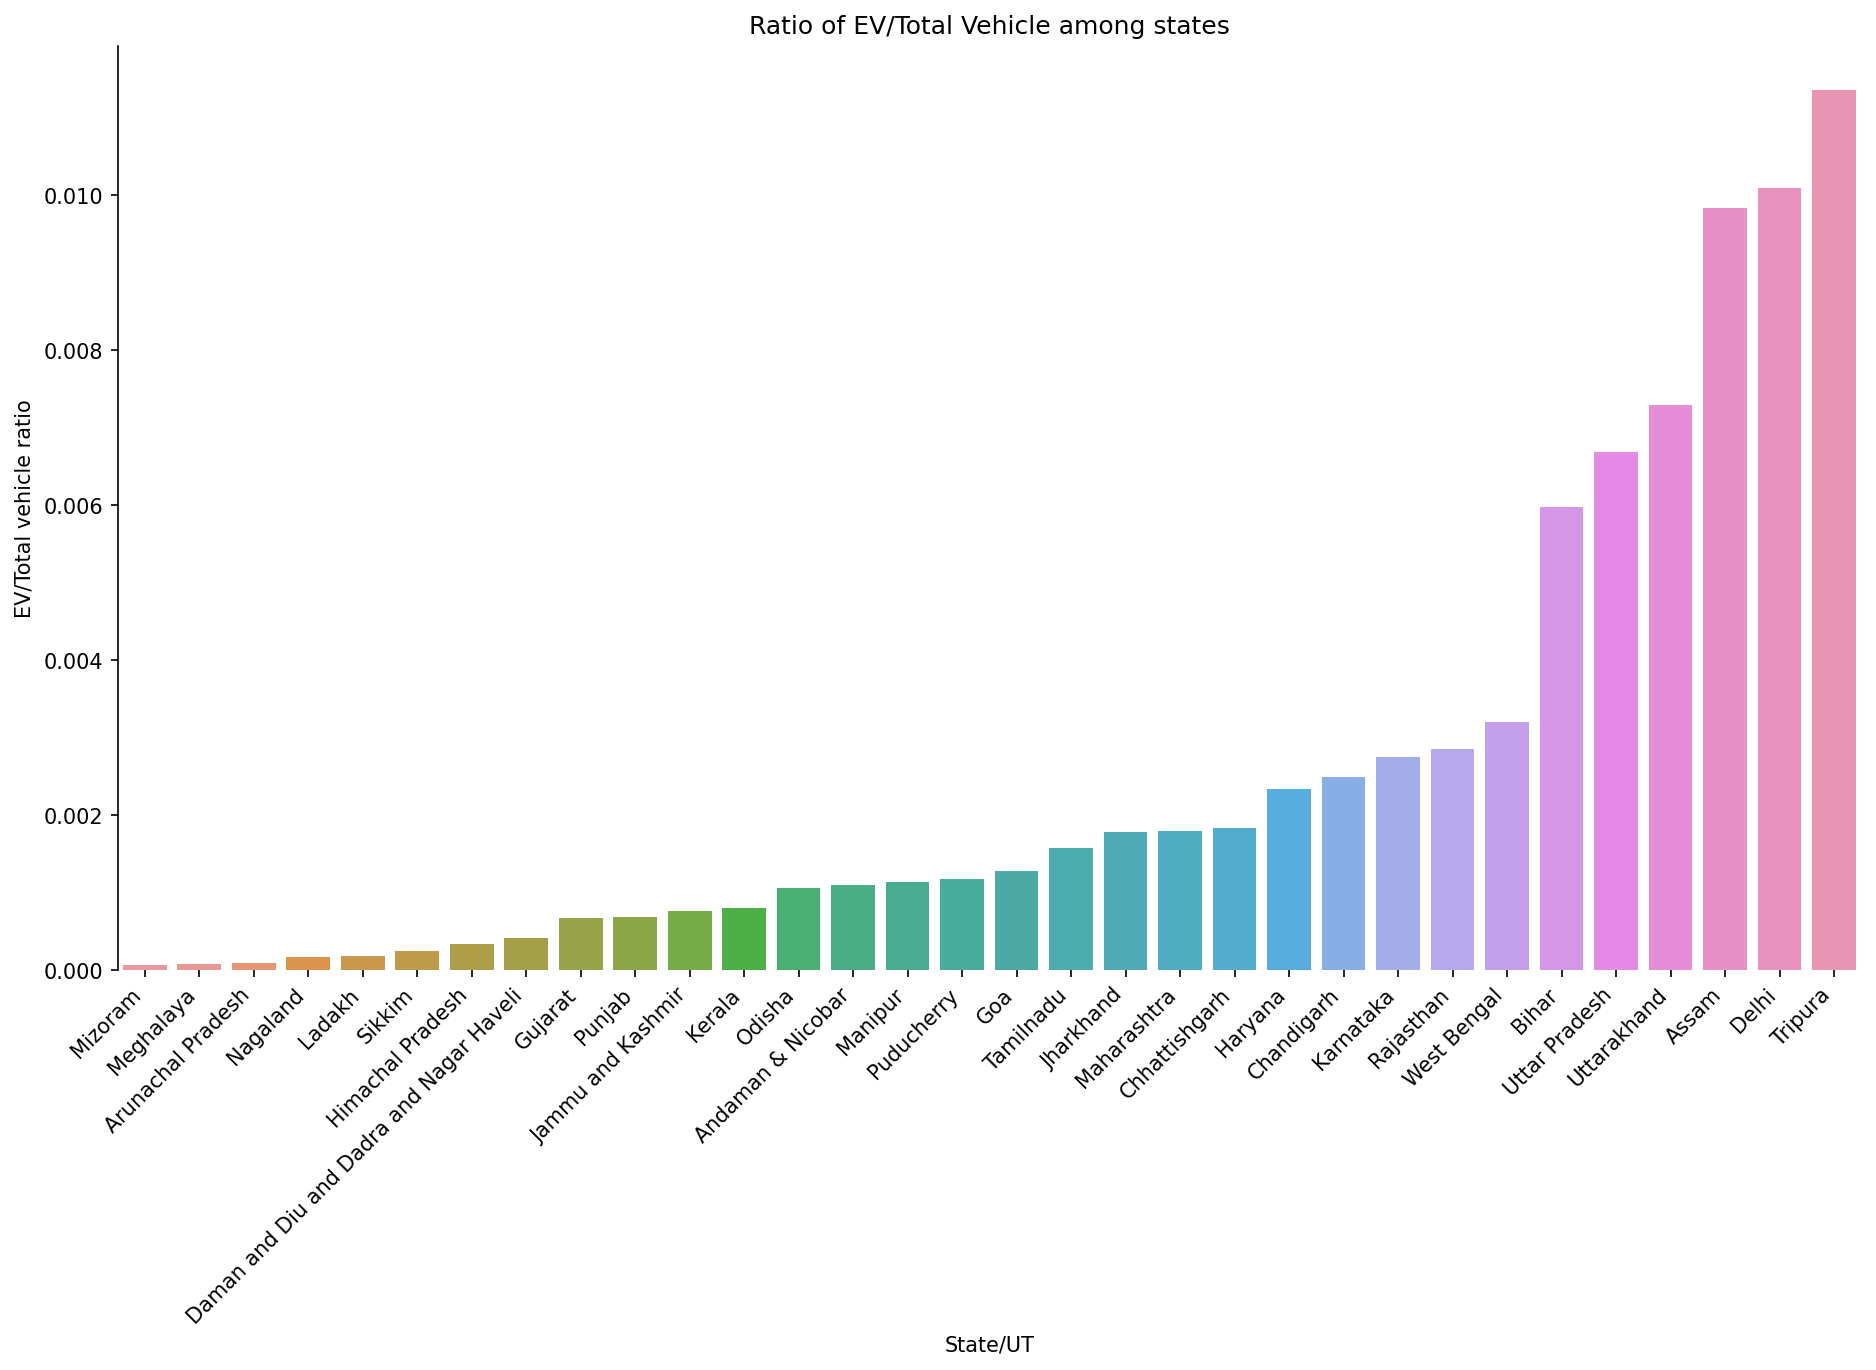

In [27]:
ev_st['ratio_of_ev']= ev_st['total_EV_08122021']/ev_st['total_vehicle_08122021']
ev_st = ev_st.sort_values('ratio_of_ev')
plt.figure(figsize=(15,8),dpi=150)
sns.barplot(x='State/UT',y='ratio_of_ev',data=ev_st,dodge=True,capsize=2)
plt.xticks(rotation =45,horizontalalignment='right')
plt.ylabel("EV/Total vehicle ratio")
plt.title("Ratio of EV/Total Vehicle among states")
sns.despine(right=True, bottom=True) 

In [29]:
## EV charging stations across states
ev_charging = pd.read_csv("/Users/sahithipadamati/Downloads/statewise_operational_charging_stations.csv")
print(ev_charging)

   Sl. No.                    State/UT  \
0        1                   Telangana   
1        2                   Jharkhand   
2        3                         Goa   
3        4                   Karnataka   
4        5            Himachal Pradesh   
5        6               Uttar Pradesh   
6        7                   Rajasthan   
7        8                       Delhi   
8        9               Chandigarh UT   
9       10  Delhi-Jaipur- Agra Highway   
10      11      Mumbai-Pune Expressway   
11      12       Jaipur- Delhi Highway   
12      13   Delhi- Chandigarh Highway   
13   Total                       Total   

    Operational Charging Stations Under FAME-I  
0                                           57  
1                                           30  
2                                           30  
3                                           65  
4                                            9  
5                                           16  
6                         

In [29]:
ev_charging.drop([9,10,11,12,13],inplace=True)

## EV charging stations till Dec 2021

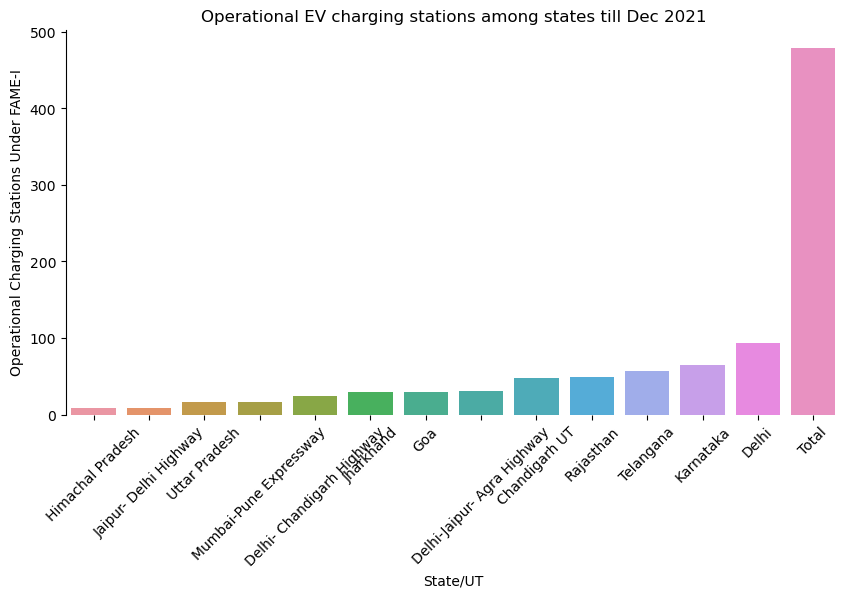

In [31]:
ev_charging = ev_charging.sort_values('Operational Charging Stations Under FAME-I')
plt.figure(figsize=(10,5))
sns.barplot(x='State/UT',y='Operational Charging Stations Under FAME-I',data=ev_charging)
plt.xticks(rotation=45)
plt.title("Operational EV charging stations among states till Dec 2021")
sns.despine(right=True, bottom=True) 

## EV charging stations after DEC 2021

In [33]:
ev_chrgng_22 = pd.read_csv("/Users/sahithipadamati/Downloads/new_sanctioned_charging_stations.csv")
print(ev_chrgng_22)

             State/UT  No. of Charging stations Sanctioned  \
0       Jammu Kashmir                                   25   
1    Himachal Pradesh                                   10   
2          Uttrakhand                                   10   
3          Chandigarh                                   70   
4             Haryana                                   50   
5           Rajasthan                                  205   
6               Delhi                                   72   
7       Uttar Pradesh                                  207   
8               Bihar                                   37   
9             Gujarat                                  278   
10     Madhya Pradesh                                  235   
11        Maharashtra                                  317   
12          Karnataka                                  172   
13             Kerala                                  211   
14         Tamil Nadu                                  281   
15      

<Figure size 2000x800 with 0 Axes>

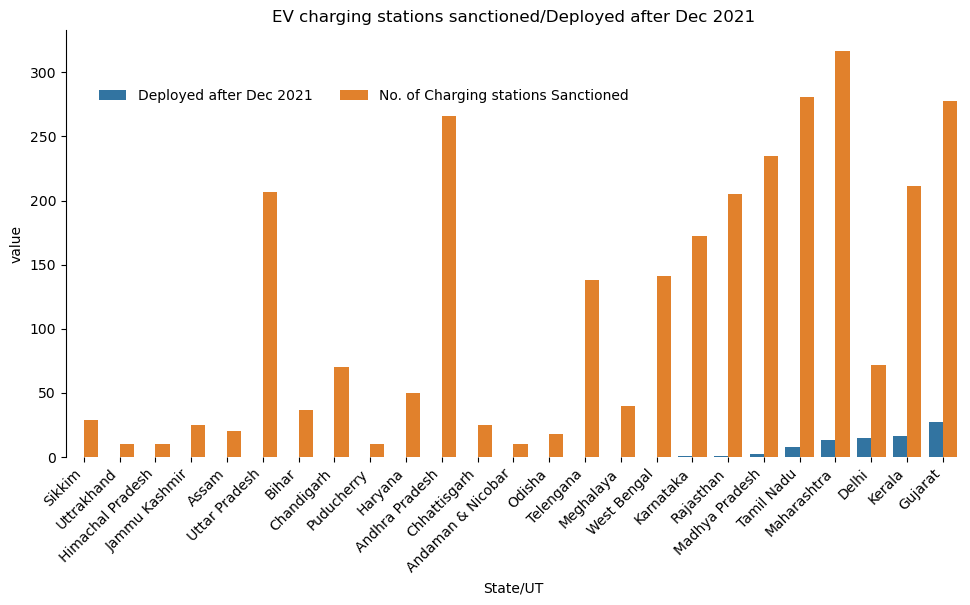

In [35]:
ev_chrgng_22_melted = pd.melt(ev_chrgng_22,id_vars='State/UT')
ev_chrgng_22_melted = ev_chrgng_22_melted.rename(columns={'variable':'Sanctioned/Deployed'})
ev_chrgng_22_melted  = ev_chrgng_22_melted.sort_values('value')

plt.figure(figsize=(20,8))
ax = sns.catplot(x='State/UT',y='value',hue='Sanctioned/Deployed',data=ev_chrgng_22_melted,kind='bar',height=5,aspect=2)
plt.xticks(rotation= 45,horizontalalignment='right')
plt.title("EV charging stations sanctioned/Deployed after Dec 2021")
sns.move_legend(ax, "lower center",bbox_to_anchor=(.3, 0.8), ncol=3, title=None, frameon=False,)
ax.despine(right=True, bottom=True)

## EV charging stations across cities

In [5]:
ev_chrg_ct = pd.read_csv("/Users/sahithipadamati/Downloads/ev_charging_across_top_cities.csv")
print(ev_chrg_ct)

         cities  till Dec 2021  after Dec 2021
0         Delhi             94              15
1   Chandigarh              48               0
2        Jaipur             49               1
3        Shimla              9               0
4          Agra             31               0
5       Lucknow              1               0
6        Ranchi             30               0
7     Hyderabad             57               0
8           Goa             30               0
9     Bangalore             65               1
10        Surat              0              25
11       Nagpur              0              12
12      Chennai              0               8
13     Thrissur              0               8
14    Ernakulum              0               6
15    Ahmedabad              0               2
16       Kunnur              0               2
17       Indore              0               2
18  Navi-Mumbai              0               1


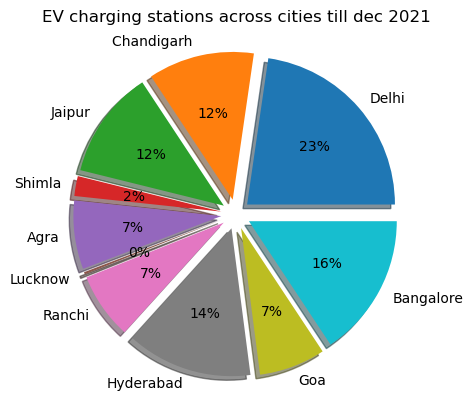

In [71]:
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(data=ev_chrg_ct[ev_chrg_ct['till Dec 2021']!=0],x='till Dec 2021', labels ='cities',shadow=True,autopct='%.0f%%',explode=explode)
plt.title('EV charging stations across cities till dec 2021')
plt.show()

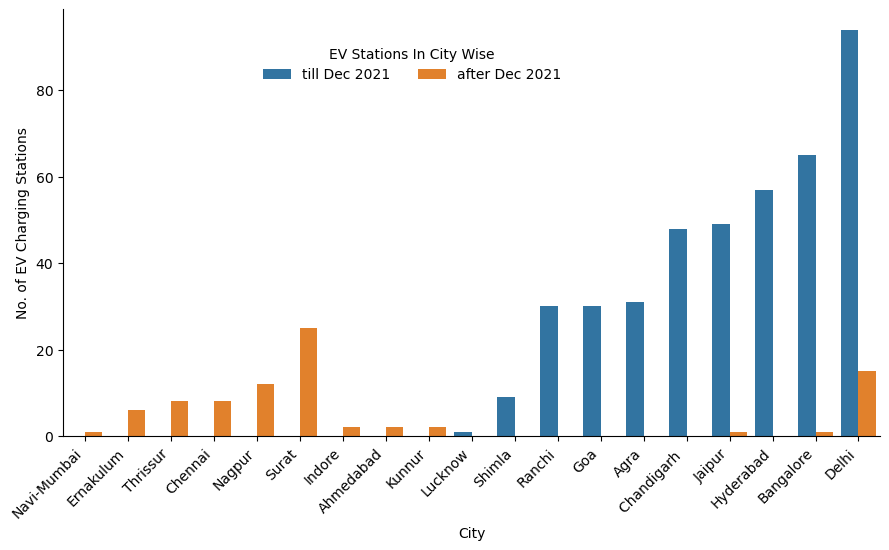

In [7]:
ev_chrg_ct = ev_chrg_ct.sort_values('till Dec 2021')
ev_chrg_ct_mlt = pd.melt(ev_chrg_ct,id_vars='cities')
ev_chrg_ct_mlt.rename(columns =  {"variable":"After/Before 2021"},inplace =True)
#ev_chrg_ct_mlt= ev_chrg_ct_mlt.sort_values('value')
ax = sns.catplot(x='cities',y='value',hue="After/Before 2021",data=ev_chrg_ct_mlt,kind='bar',height=5,aspect=1.8)
plt.xlabel('City')
plt.ylabel('No. of EV Charging Stations')
plt.xticks(rotation=45,horizontalalignment='right')
sns.move_legend(ax, "lower center",bbox_to_anchor=(.4, 0.8), ncol=3, title="EV Stations In City Wise", frameon=False,)
plt.show()

## EV charging stations on highways

In [43]:
ev_chrg_hw = pd.read_csv("/Users/sahithipadamati/Downloads/highway_charging_station_sanctioned.csv",encoding='cp1252')
print(ev_chrg_hw)

   Sl. No     Category    Expressways/Highways  \
0       1  Expressways           Mumbai - Pune   
1       2  Expressways    Ahmadabad - Vadodara   
2       3  Expressways       Delhi Agra Yamuna   
3       4  Expressways        Bengaluru Mysore   
4       5  Expressways       Bangaluru-Chennai   
5       6  Expressways            Surat-Mumbai   
6       7  Expressways            Agra-Lucknow   
7       8  Expressways  Eastern Peripheral (A)   
8       9  Expressways           Hyderabad ORR   
9       1     Highways        Delhi - Srinagar   
10      2     Highways         Delhi – Kolkata   
11      3     Highways           Agra - Nagpur   
12      4     Highways  Meerut to GangotriDham   
13      5     Highways          Mumbai - Delhi   
14      6     Highways           Mumbai-Panaji   
15      7     Highways         Mumbai - Nagpur   
16      8     Highways      Mumbai - Bengaluru   
17      9     Highways   Kolkata - Bhubaneswar   
18     10     Highways        Kolkata - Nagpur   


Text(0.5, 1.0, 'Ev charging stations at Highways')

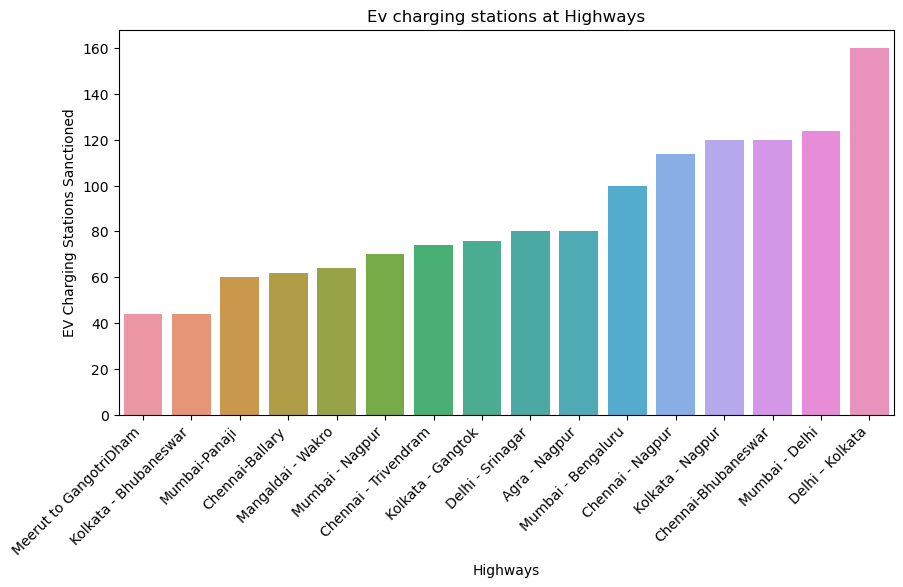

In [45]:
stn_hw = ev_chrg_hw[ev_chrg_hw['Category']=='Highways']
stn_hw = stn_hw.sort_values('EV Charging Stations Sanctioned')
plt.figure(figsize=(10,5))
sns.barplot(x='Expressways/Highways',y='EV Charging Stations Sanctioned',data=stn_hw)
plt.xticks(rotation=45,horizontalalignment='right')
plt.xlabel('Highways')
plt.title('Ev charging stations at Highways')

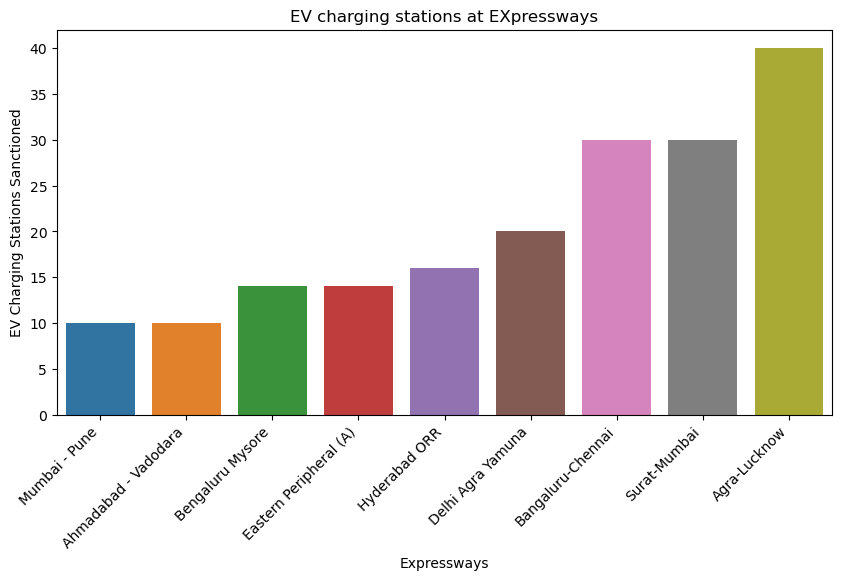

In [47]:
stn_expw = ev_chrg_hw[ev_chrg_hw['Category']=='Expressways']
stn_expw = stn_expw.sort_values('EV Charging Stations Sanctioned')
plt.figure(figsize=(10,5))
sns.barplot(x='Expressways/Highways',y='EV Charging Stations Sanctioned',data=stn_expw)
plt.title("EV charging stations at EXpressways")
plt.xlabel('Expressways')
plt.xticks(rotation=45,horizontalalignment='right') 
plt.show()

## EV charging stations at Energy Sector Company outlets

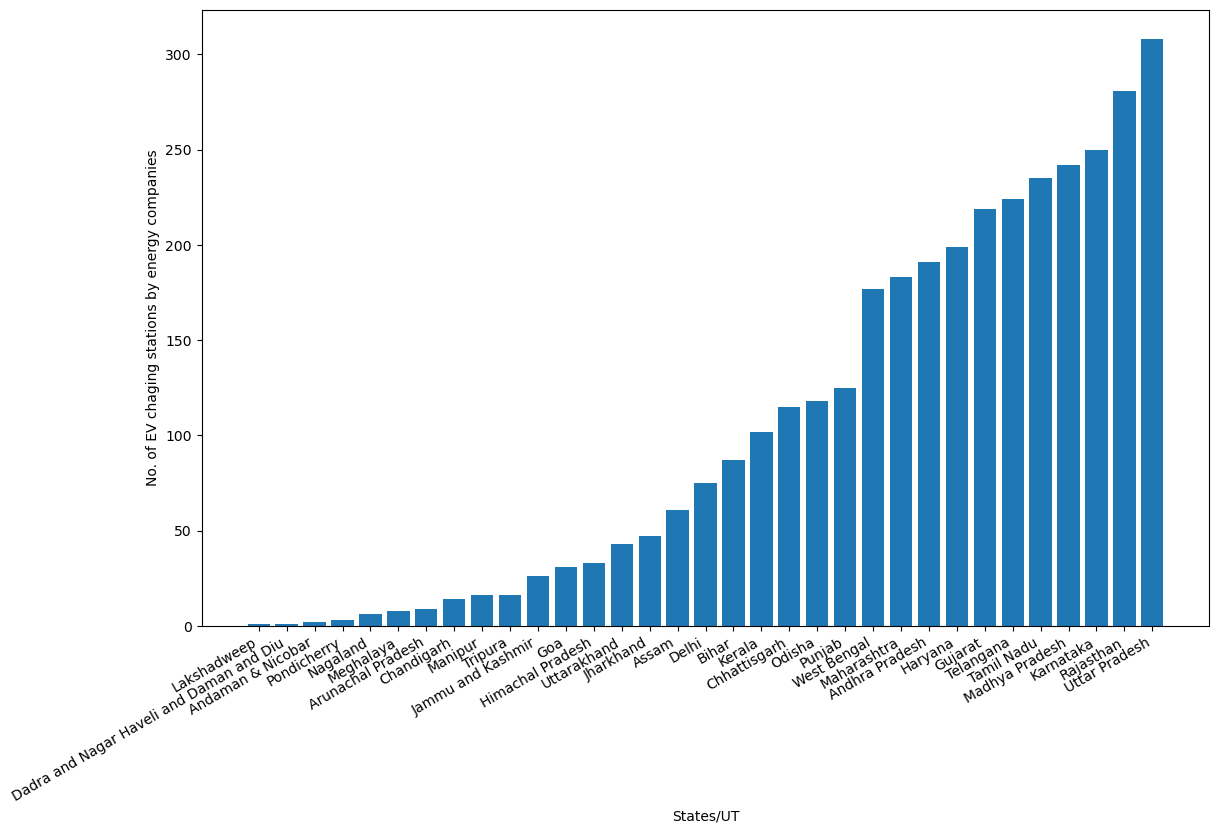

In [75]:
ev_chrg_omc = pd.read_csv("/Users/sahithipadamati/Downloads/Charging_st_OMC_07022.csv")
ev_chrg_omc  =ev_chrg_omc.sort_values("No of RO's where EV Charging Facility available")
ev_chrg_omc.drop([33],inplace =True)
plt.figure(figsize=(13,8))
plt.bar(x=ev_chrg_omc['State/UT'],height=ev_chrg_omc["No of RO's where EV Charging Facility available"])
plt.xticks(rotation=30,horizontalalignment='right')
plt.ylabel('No. of EV chaging stations by energy companies')
plt.xlabel("States/UT")
plt.show()

## Market segmentation based on Geographical feature as Segmentation Variable
### combine dataset along states

In [51]:
ev_st_merged  = ev_st.merge(ev_chrgng_22, on='State/UT', how='left')
ev_st_merged = ev_st_merged.fillna(0)
ev_st_merged.drop(['State/UT'],axis=1,inplace =True)

### K-means Clustering algorithm

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
ev_st_merged = scaler.fit_transform(ev_st_merged)
# statistics of scaled data
pd.DataFrame(ev_st_merged).describe()

,0,1,2,3,4
count,32.000000,3.200000e+01,3.200000e+01,32.000000,32.000000
mean,0.000000,4.163336e-17,-1.110223e-16,0.000000,0.000000
std,1.016001,1.016001e+00,1.016001e+00,1.016001,1.016001
min,-0.827914,-5.480547e-01,-8.034462e-01,-0.655659,-0.370301
25%,-0.787012,-5.396051e-01,-6.278189e-01,-0.655659,-0.370301
50%,-0.458033,-3.662725e-01,-4.302237e-01,-0.545058,-0.370301
75%,0.411380,3.218031e-01,6.805760e-02,0.124081,-0.370301
max,2.927088,4.613705e+00,2.827003e+00,2.850406,4.012438


In [55]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(ev_st_merged)

KMeans(n_clusters=2)

In [57]:
kmeans.inertia_

90.5354001922324

Text(0, 0.5, 'Inertia')

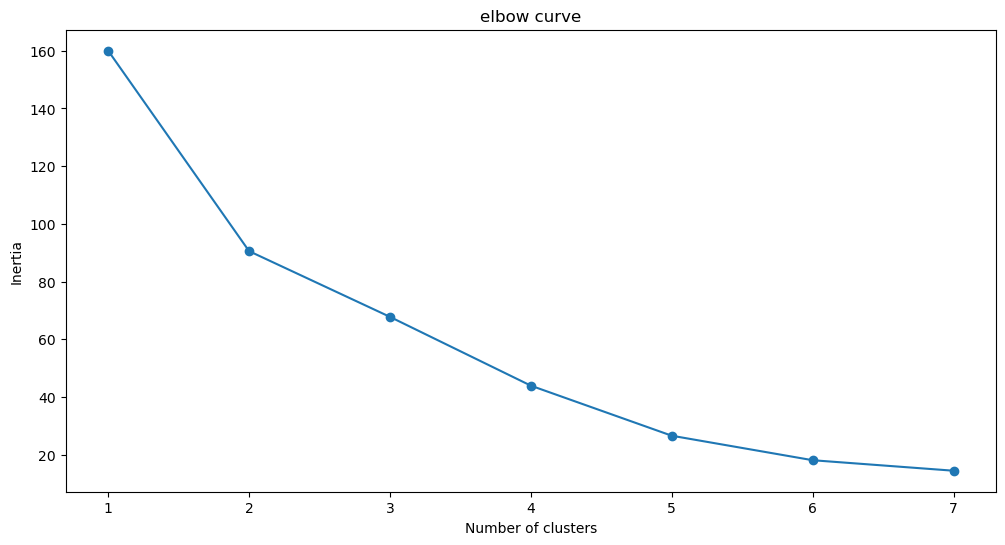

In [59]:
SSE = []
for cluster in range(1,8):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(ev_st_merged)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,8), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.title("elbow curve")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [61]:
means = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(ev_st_merged)
pred = kmeans.predict(ev_st_merged)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(ev_st_merged))
df_pca.rename(columns={0:'x',1:'y'})
df_pca['cluster']=pred
df_pca

,0,1,cluster
0,-1.368096,0.376083,1
1,-1.126572,0.522932,1
2,-1.369693,0.370780,1
3,-1.358964,0.353560,1
4,-1.374114,0.352234,1
5,-1.196798,0.445505,1
6,-1.199436,0.349738,1
7,-1.341539,0.299592,1
8,3.114049,3.337145,2
9,-0.615395,0.164571,1


Text(0.5, 1.0, 'clusters')

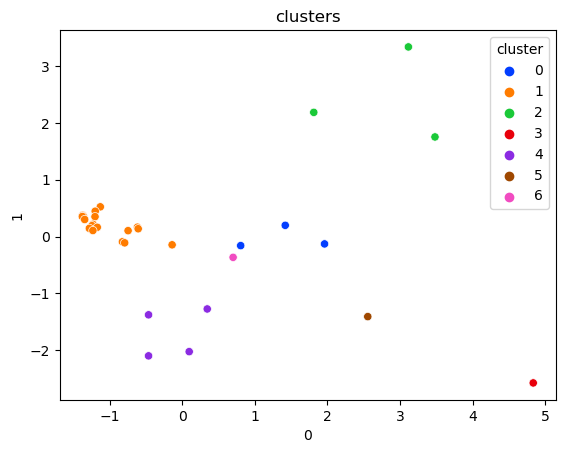

In [63]:
centers = kmeans.cluster_centers_
centers = pca.fit(centers)
sns.scatterplot(x= 0,y=1,hue='cluster',data=df_pca,palette="bright")
plt.title("clusters")

In [79]:
df_pca['State/UT'] = ev_st['State/UT']
df = df_pca.drop([0,1],axis=1)
cluster_grp= df.groupby('cluster')
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["State_name", "Cluster"]
for cluster in range(7):
    x.add_row([cluster_grp.get_group(cluster)['State/UT'].values,cluster])
print(x)

+-------------------------------------------------------------------------+---------+
|                                State_name                               | Cluster |
+-------------------------------------------------------------------------+---------+
|                     ['Punjab' 'Rajasthan' 'Sikkim']                     |    0    |
|  ['Andaman & Nicobar' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'  |    1    |
|  'Chhattishgarh' 'Delhi' 'Goa' 'Haryana' 'Himachal Pradesh' 'Jharkhand' |         |
|    'Karnataka' 'Kerala' 'Ladakh' 'Maharashtra' 'Meghalaya' 'Nagaland'   |         |
|                          'Odisha' 'Puducherry']                         |         |
|                ['Gujarat' 'Jammu and Kashmir' 'Mizoram']                |    2    |
|                               ['Tripura']                               |    3    |
|  ['Tamilnadu' 'Daman and Diu and Dadra and Nagar Haveli' 'Uttarakhand'  |    4    |
|                              'West Bengal']         